# Data Transformation
- scaling
- categorical encoding
- text BOW (Bag of Words)

## Scaling
- MinMax scaling
- Standard scaling
- robust scaling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [3]:
df.head()

,x1,x2,x3
0,4.257038,7.482122,4.075100
1,0.498613,5.347403,4.983017
2,1.695267,4.339700,-13.654472
3,1.048933,5.950853,-3.295132
4,-0.639551,4.690954,-8.909343


<Axes: ylabel='Density'>

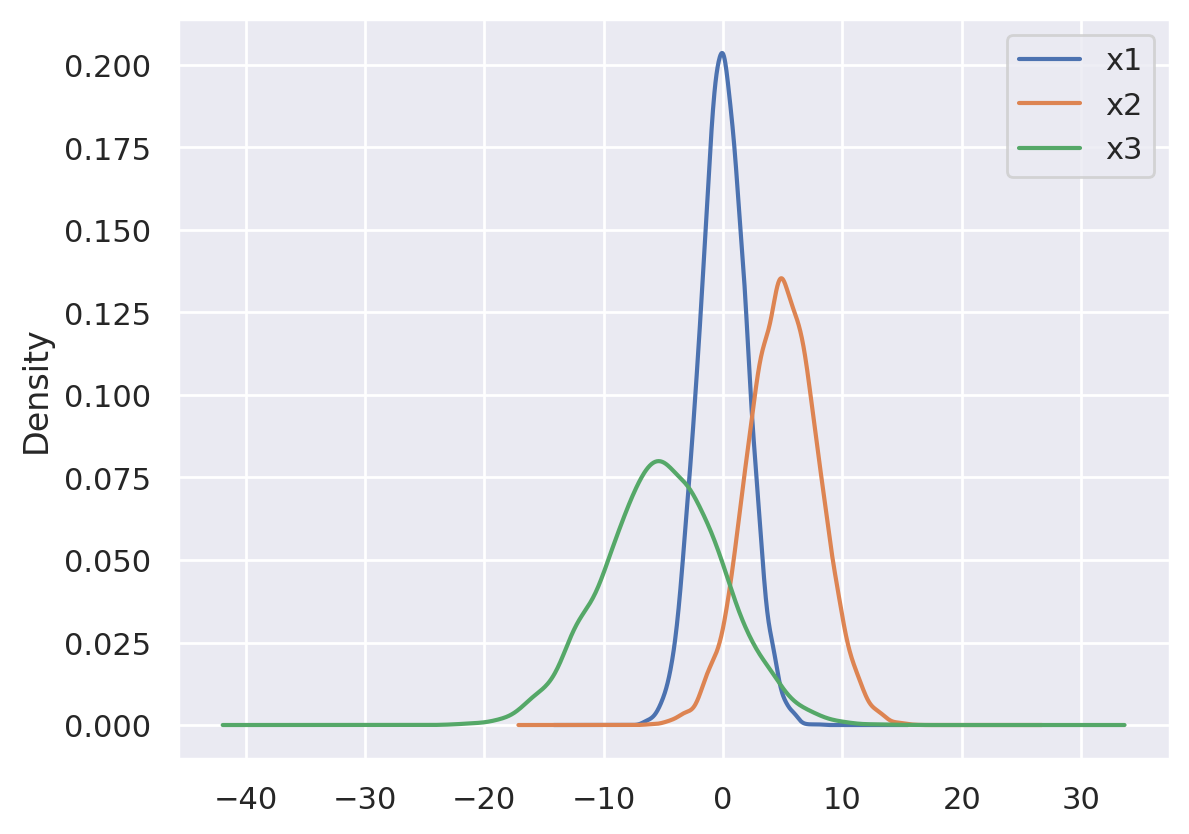

In [4]:
# plotting data

df.plot.kde()  # Generate Kernel Density Estimate plot using Gaussian kernels.

- Standard Scaling
  - z = (x - mean) / std

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_tf = ss.fit_transform(df)     # returns an array
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

<Axes: ylabel='Density'>

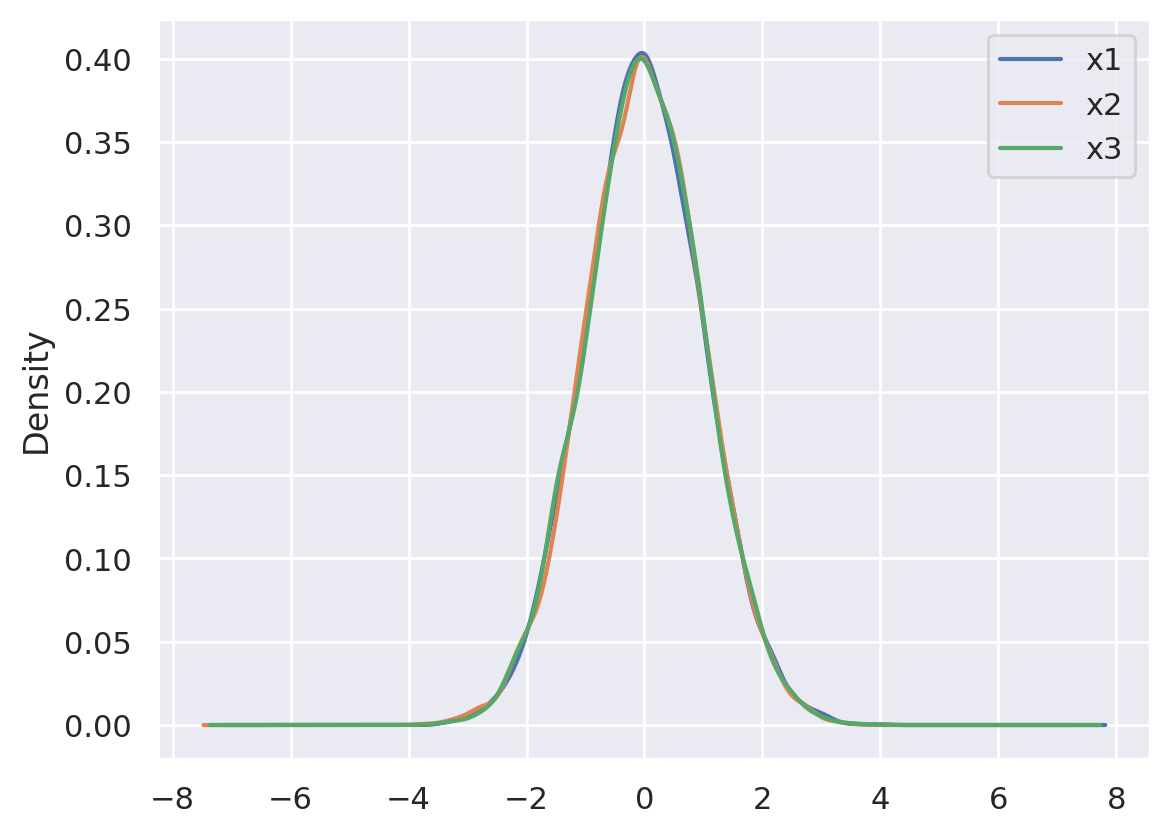

In [6]:
df.plot.kde()

<Axes: ylabel='Density'>

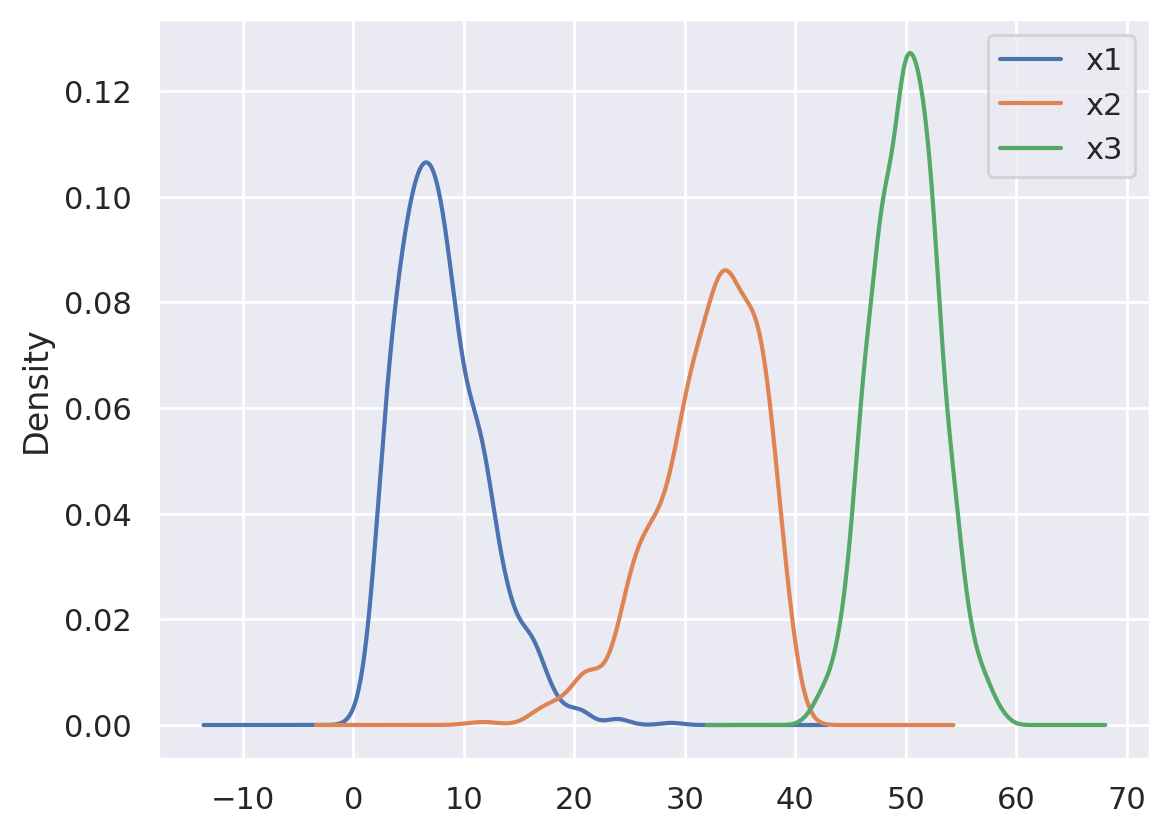

In [7]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

df.plot.kde()

- MinMax scaler

<Axes: ylabel='Density'>

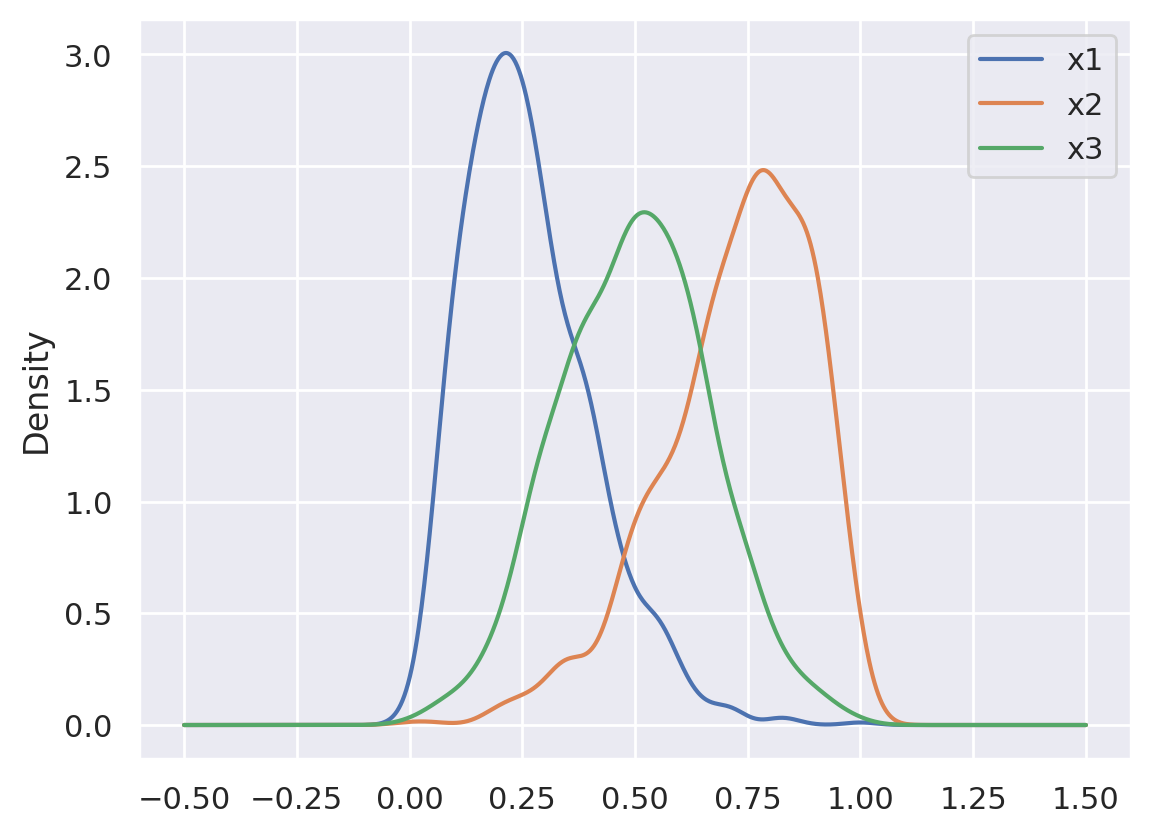

In [8]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

In [9]:
df.x2.max(), df.x2.min()

(1.0, 0.0)

<Axes: ylabel='Density'>

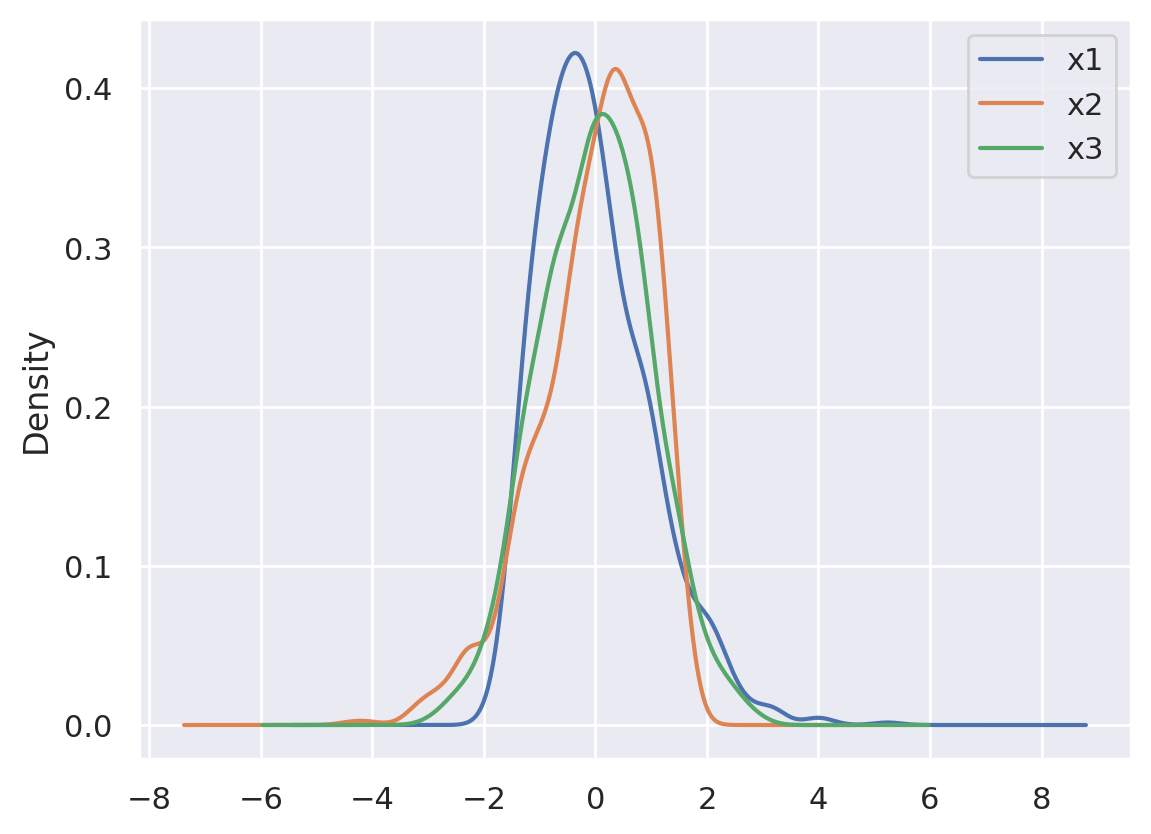

In [10]:
standardscaler = StandardScaler()
data_tf = standardscaler.fit_transform(df)

df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

In [11]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 1, 25)]),
})

<Axes: ylabel='Density'>

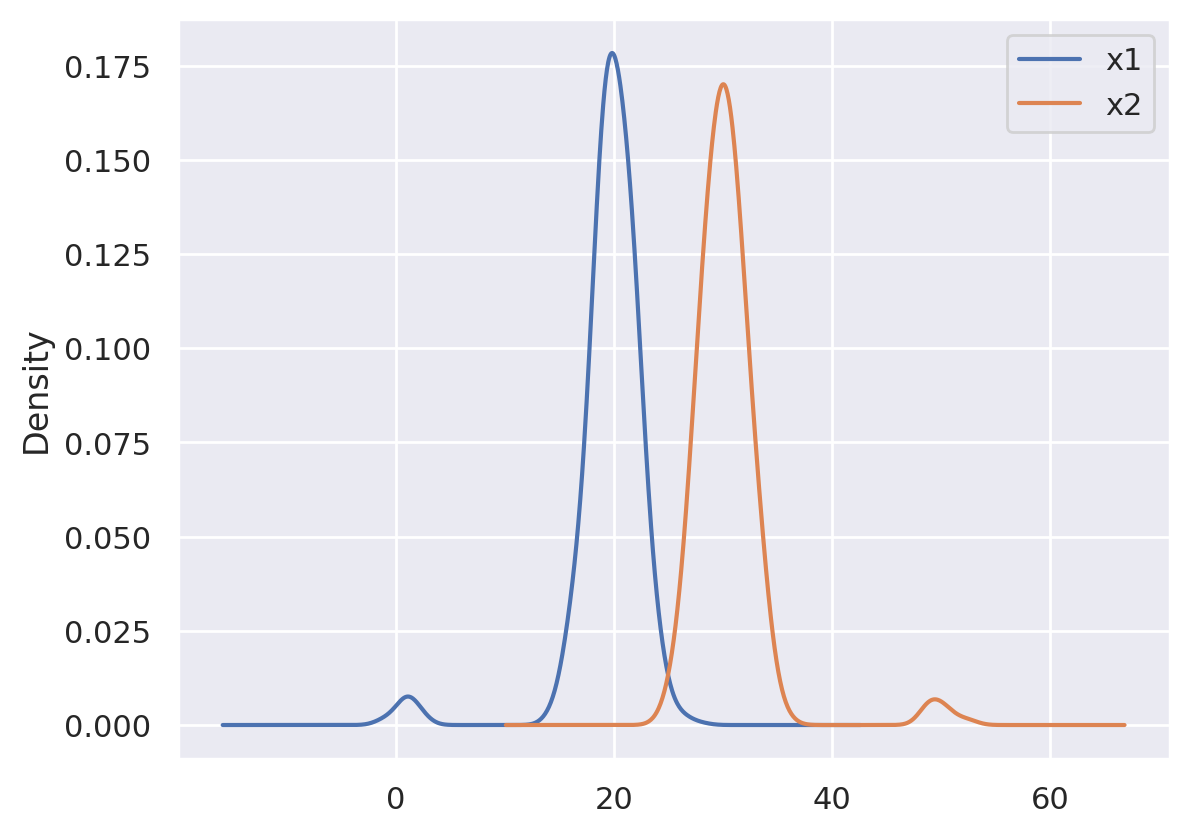

In [12]:
df.plot.kde()

- Robust scaler
  - z = (x-median)/IQR
  - robust to outliers
  - This Scaler removes the median and scales the data according to the quartile range (defaults to IQR: Interquartile Range).


<Axes: ylabel='Density'>

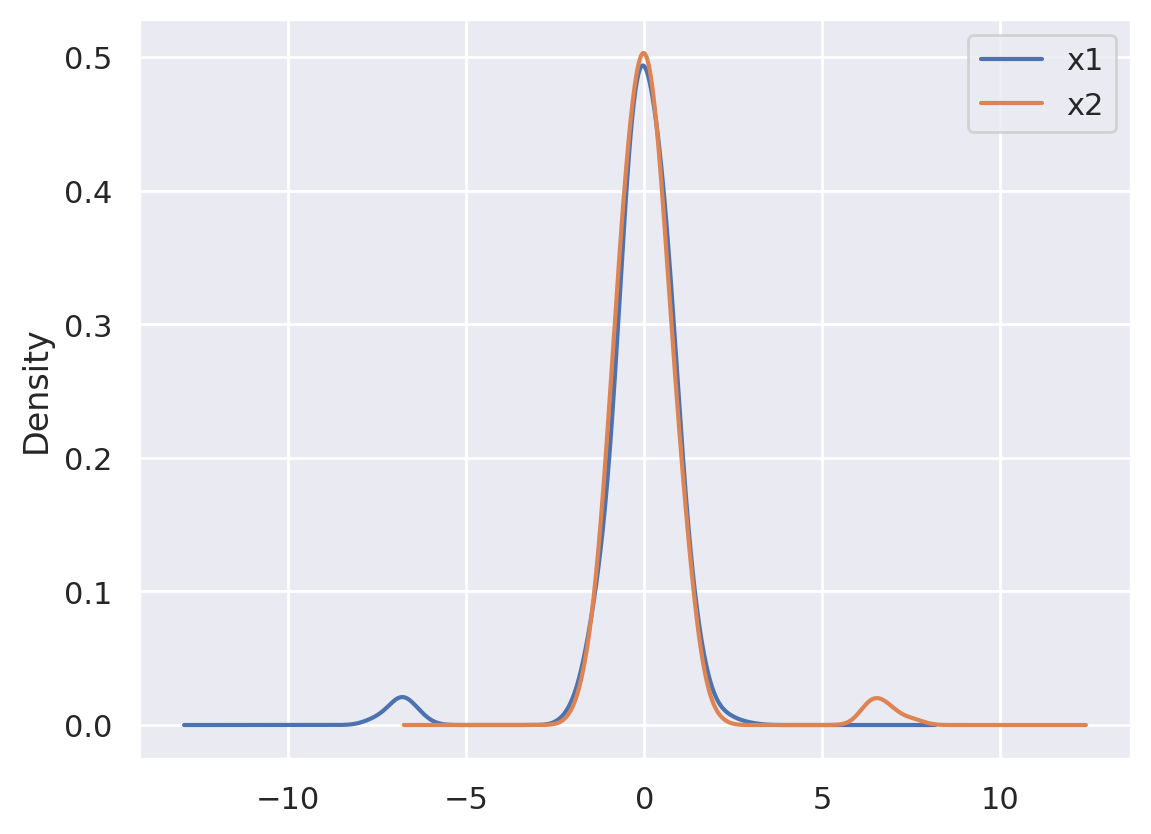

In [13]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])
df.plot.kde()

<Axes: ylabel='Density'>

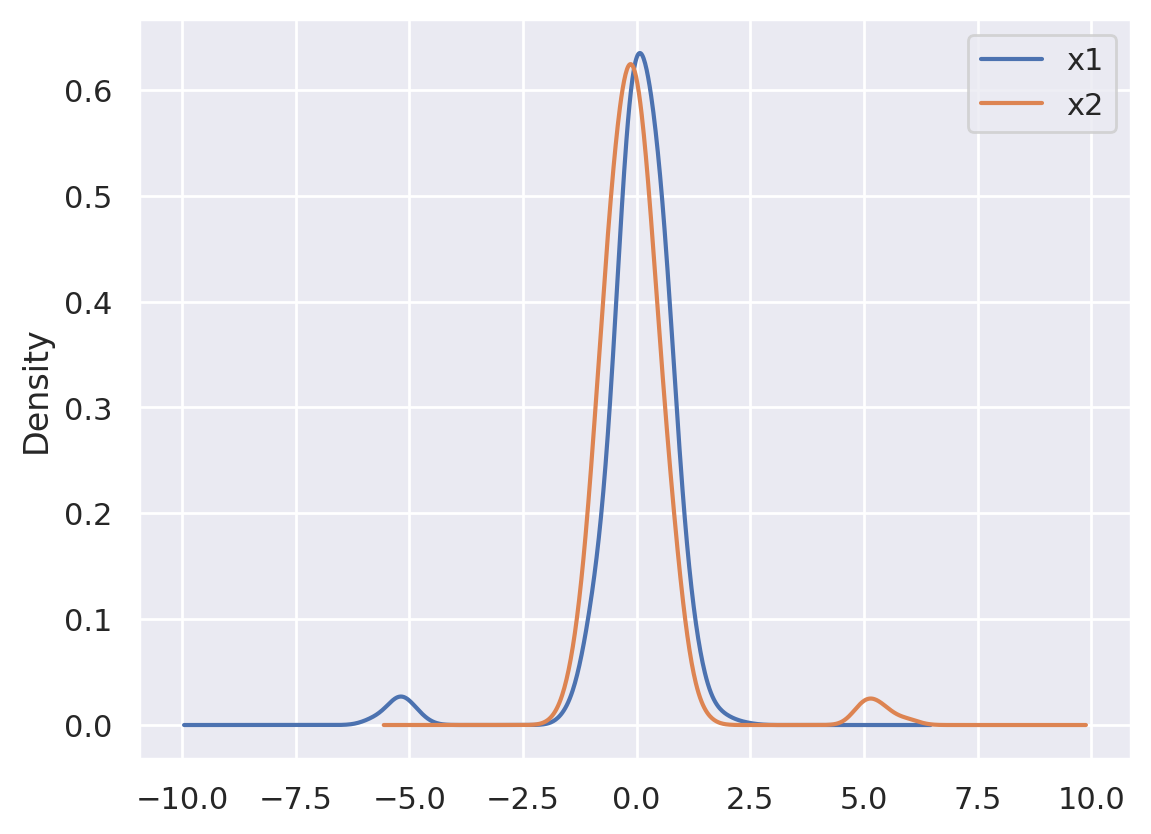

In [14]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

data_tf = standardscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])
df.plot.kde()

## 7. Categorical encoding


#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [15]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

df.Income.map({'Low':1,'Medium':2,'High':3})

,Income
0,1
1,1
2,3
3,2
4,2
5,3


In [17]:
ord = OrdinalEncoder(categories=[['Low','Medium','High']])
ord.fit_transform(df['Income'].values.reshape(-1,1))

array([[0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.]])

In [18]:
ord.categories_

[array(['Low', 'Medium', 'High'], dtype=object)]

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [19]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})
df

,Age,Gender
0,33,Male
1,44,Female
2,22,Male
3,44,Female
4,55,Male
5,22,Male


In [20]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le = LabelEncoder()   # encode labels with values between 0 and (no. of class -1)
df['gender_tf'] = le.fit_transform(df.Gender)

In [22]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [23]:
ohe = OneHotEncoder()
ohe.fit_transform(df[['Gender']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [24]:
# same as the above
ohe.fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [25]:
ohe.get_feature_names_out()

array(['gender_tf_0', 'gender_tf_1'], dtype=object)

- use pandas.dummies()

In [26]:
pd.get_dummies(df['gender_tf'], prefix='gender')

,gender_0,gender_1
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
5,False,True


In [27]:
pd.get_dummies(df['Gender'], prefix='gender')

,gender_Female,gender_Male
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
5,False,True


## Text Processing - CountVectorizer


- CountVectorizer
  * Each column represents one word, count refers to frequency of the word
  * Sequence of words are not maintained

- Hyperparameters
  * n_grams - Number of words considered for each column
  * stop_words - words not considered
  * vocabulary - only words considered


In [28]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [30]:
cv.fit_transform(df.Text)

<4x13 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [31]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]])

In [32]:
cv.get_feature_names_out()

array(['and', 'awesome', 'document', 'first', 'food', 'impossible', 'is',
       'mission', 'one', 'second', 'the', 'third', 'this'], dtype=object)

In [33]:
cv.vocabulary_

{'this': 12,
 'is': 6,
 'the': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 9,
 'and': 0,
 'third': 11,
 'one': 8,
 'mission': 7,
 'impossible': 5}

In [34]:
cv = CountVectorizer(stop_words=['the','is', 'this', 'and', 'one'])
cv.fit_transform(df.Text).toarray()

array([[1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0]])

In [35]:
cv.vocabulary_

{'first': 2,
 'document': 1,
 'awesome': 0,
 'food': 3,
 'second': 6,
 'third': 7,
 'mission': 5,
 'impossible': 4}

In [36]:
cv = CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()
cv.vocabulary_

{'mission': 0, 'food': 1, 'second': 2}

In [37]:
cv = CountVectorizer(ngram_range=(1,2))
cv.fit_transform(df.Text).toarray()

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1]])

In [38]:
cv.vocabulary_, len(cv.vocabulary_)

({'this': 28,
  'is': 10,
  'the': 21,
  'first': 6,
  'document': 4,
  'awesome': 2,
  'food': 8,
  'this is': 29,
  'is the': 12,
  'the first': 22,
  'first document': 7,
  'document awesome': 5,
  'awesome food': 3,
  'second': 18,
  'the second': 24,
  'second second': 20,
  'second document': 19,
  'and': 0,
  'third': 26,
  'one': 16,
  'mission': 14,
  'impossible': 9,
  'and the': 1,
  'the third': 25,
  'third one': 27,
  'one the': 17,
  'the is': 23,
  'is mission': 11,
  'mission impossible': 15,
  'is this': 13,
  'this the': 30},
 31)

In [39]:
cv = CountVectorizer(ngram_range=(1,2), stop_words='english')
# stop_words: Stop Words 는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다.
# 보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당한다.
cv.fit_transform(df.Text).toarray()

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [40]:
cv.vocabulary_

{'document': 2,
 'awesome': 0,
 'food': 4,
 'document awesome': 3,
 'awesome food': 1,
 'second': 8,
 'second second': 10,
 'second document': 9,
 'mission': 6,
 'impossible': 5,
 'mission impossible': 7}

## Text Processing - TfIdfVectorizer
* Words occuring more frequently in a doc versus entire corpus is considered more important
* The importance is in scale of 0 & 1

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = CountVectorizer(stop_words='english')
vectorizer2 = TfidfVectorizer(stop_words='english')
# a built-in stop word list for English is used.

In [42]:
vectorizer1.fit_transform(df.Text).toarray().round(2)

array([[1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 2],
       [0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0]])

In [43]:
vectorizer2.fit_transform(df.Text).toarray().round(2)

array([[0.64, 0.41, 0.64, 0.  , 0.  , 0.  ],
       [0.  , 0.3 , 0.  , 0.  , 0.  , 0.95],
       [0.  , 0.  , 0.  , 0.71, 0.71, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [44]:
vectorizer1.get_feature_names_out()

array(['awesome', 'document', 'food', 'impossible', 'mission', 'second'],
      dtype=object)

In [45]:
vectorizer2.get_feature_names_out()

array(['awesome', 'document', 'food', 'impossible', 'mission', 'second'],
      dtype=object)

In [46]:
vectorizer2.vocabulary_

{'document': 1,
 'awesome': 0,
 'food': 2,
 'second': 5,
 'mission': 4,
 'impossible': 3}

# Exercise

- normalization
   - Each sample (i.e. `each row` of the data matrix) with t least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.
   - normalized vector is ***y=x/z*** for the following z.

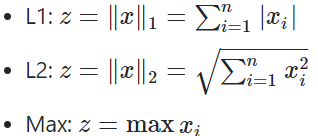

In [58]:
from sklearn.preprocessing import normalize                   # function
from sklearn.preprocessing import Normalizer, StandardScaler  # classes

In [78]:
X = [[ 1., -1.,  2., 3.],
     [ 2.,  0.,  0., 0.],
     [ 0.,  1., -1., 2.]]

In [79]:
# function
normalize(X, norm='l2', axis=0).round(2)

array([[ 0.45, -0.71,  0.89,  0.83],
       [ 0.89,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.71, -0.45,  0.55]])

In [80]:
# L1-normalizer (class)
X = np.array(X)
nm = Normalizer(norm='l2')   # default - along the rows (samples)
nm.fit(X.T)
X_tr = nm.transform(X.T)
X_tr.T

array([[ 0.4472136 , -0.70710678,  0.89442719,  0.83205029],
       [ 0.89442719,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.4472136 ,  0.5547002 ]])

In [81]:
np.square(X_tr.T).sum(axis=0)

array([1., 1., 1., 1.])

In [82]:
# Standard scaler
sc = StandardScaler()    # along the columns (features)
sc.fit(X)
print(sc.mean_, sc.var_)
sc.transform(X)

[1.         0.         0.33333333 1.66666667] [0.66666667 0.66666667 1.55555556 1.55555556]


array([[ 0.        , -1.22474487,  1.33630621,  1.06904497],
       [ 1.22474487,  0.        , -0.26726124, -1.33630621],
       [-1.22474487,  1.22474487, -1.06904497,  0.26726124]])

In [84]:
sc.transform([[-1.,1.,0.,0.]])

array([[-2.44948974,  1.22474487, -0.26726124, -1.33630621]])

--------------------------